In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings("ignore")

In [2]:
#load data
data=pd.read_csv('city_data.csv') 

In [3]:
data

,City,Date,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20517,Lucknow,27-06-2020,32.23,NaN,9.47,19.22,17.78,11.63,0.80,3.77,56.36,10.16,24.19,NaN,74.0,Satisfactory
20518,Lucknow,28-06-2020,34.58,NaN,10.39,17.67,17.60,11.68,0.81,2.85,56.40,10.98,13.78,NaN,77.0,Satisfactory
20519,Lucknow,29-06-2020,30.19,NaN,12.14,18.47,18.87,11.63,0.80,3.36,43.61,15.05,11.58,NaN,65.0,Satisfactory
20520,Lucknow,30-06-2020,38.27,NaN,6.14,11.94,11.95,11.79,0.72,4.31,41.17,21.78,7.49,NaN,69.0,Satisfactory


In [4]:
#check shape
data.shape

(20522, 16)

In [5]:
data.columns

Index(['City', 'Date', 'PM25', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [6]:
#get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20522 entries, 0 to 20521
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20522 non-null  object 
 1   Date        20522 non-null  object 
 2   PM25        18162 non-null  float64
 3   PM10        9294 non-null   float64
 4   NO          18539 non-null  float64
 5   NO2         18545 non-null  float64
 6   NOx         17765 non-null  float64
 7   NH3         11457 non-null  float64
 8   CO          18611 non-null  float64
 9   SO2         17894 non-null  float64
 10  O3          17984 non-null  float64
 11  Benzene     18773 non-null  float64
 12  Toluene     18662 non-null  float64
 13  Xylene      9440 non-null   float64
 14  AQI         17940 non-null  float64
 15  AQI_Bucket  17940 non-null  object 
dtypes: float64(13), object(3)
memory usage: 2.5+ MB


In [7]:
data

,City,Date,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20517,Lucknow,27-06-2020,32.23,NaN,9.47,19.22,17.78,11.63,0.80,3.77,56.36,10.16,24.19,NaN,74.0,Satisfactory
20518,Lucknow,28-06-2020,34.58,NaN,10.39,17.67,17.60,11.68,0.81,2.85,56.40,10.98,13.78,NaN,77.0,Satisfactory
20519,Lucknow,29-06-2020,30.19,NaN,12.14,18.47,18.87,11.63,0.80,3.36,43.61,15.05,11.58,NaN,65.0,Satisfactory
20520,Lucknow,30-06-2020,38.27,NaN,6.14,11.94,11.95,11.79,0.72,4.31,41.17,21.78,7.49,NaN,69.0,Satisfactory


In [8]:
#check data types
data.dtypes

City           object
Date           object
PM25          float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

Filling null values

In [9]:
#check null values
data.isna().sum()

City              0
Date              0
PM25           2360
PM10          11228
NO             1983
NO2            1977
NOx            2757
NH3            9065
CO             1911
SO2            2628
O3             2538
Benzene        1749
Toluene        1860
Xylene        11082
AQI            2582
AQI_Bucket     2582
dtype: int64

In [10]:
#backward and forward filling
data['PM25'].fillna(method = 'bfill',inplace = True )
data['PM10'].fillna(method = 'ffill',inplace = True )
data['PM10'].fillna(method = 'bfill',inplace = True )
data['NO'].fillna(method = 'ffill',inplace = True )
data['NO2'].fillna(method = 'ffill',inplace = True )
data['NOx'].fillna(method = 'ffill',inplace = True )
data['NH3'].fillna(method = 'bfill',inplace = True )
data['CO'].fillna(method = 'ffill',inplace = True )
data['SO2'].fillna(method = 'ffill',inplace = True )
data['O3'].fillna(method = 'ffill',inplace = True )
data['Benzene'].fillna(method = 'ffill',inplace = True )
data['Toluene'].fillna(method = 'ffill',inplace = True )
data['Xylene'].fillna(method = 'ffill',inplace = True )
data['AQI'].fillna(method = 'bfill',inplace = True )
data['AQI_Bucket'].fillna(method = 'bfill',inplace = True )

In [11]:
#recheck null values
data.isna().sum()

City          0
Date          0
PM25          0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [12]:
#convert to datetime
data['Date']=pd.to_datetime(data['Date'])
data['year']=data['Date'].apply(lambda x:x.year)
data['month']=data['Date'].apply(lambda x:x.month)

pollutants are PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene

In [13]:
most_polluted=data[['City','AQI','PM25','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene',]].groupby(['City']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
City,,,,,,,,,,,,,
Ahmedabad,372.349154,63.342654,77.963506,17.949316,47.439537,41.759578,33.850000,17.785795,53.286475,38.921314,5.326210,24.230901,3.833130
Delhi,258.610254,117.105903,233.949716,38.971533,50.769856,58.567023,41.987641,1.976053,16.026446,50.816546,3.544480,17.185042,1.015037
Lucknow,232.798905,133.787601,31.580000,15.129124,33.195256,23.391274,19.104500,2.126904,12.032111,37.717332,3.515361,5.496730,0.180000
Kolkata,138.920147,60.883145,109.962715,26.703514,40.120958,63.308501,18.370381,0.799251,9.268034,31.252531,10.858956,15.405246,1.601425


Exploratory Data Analysis

Most polluted city is Ahmedabad,followed by Delhi, Lucknow, Kolkata 


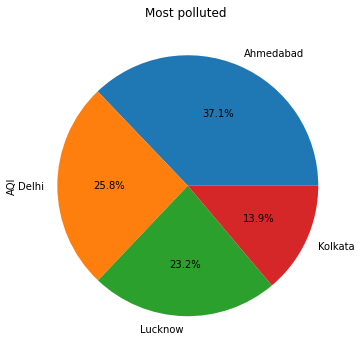

In [14]:
plt.figure(figsize=(6,6))
most_polluted['AQI'].plot(kind='pie', subplots=True, autopct='%1.1f%%')
plt.title('Most polluted ')
print('Most polluted city is Ahmedabad,followed by Delhi, Lucknow, Kolkata ')

Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene)


In [15]:
data['Vehicular Pollution content'] = data['PM25']+data['PM10']+data['NO']+data['NO2']+data['NOx']+data['NH3']+data['CO']

In [16]:
data['Industrial Pollution content'] = data['SO2']+data['O3']+data['Benzene']+data['Toluene']+data['Xylene']

<function matplotlib.pyplot.show(close=None, block=None)>

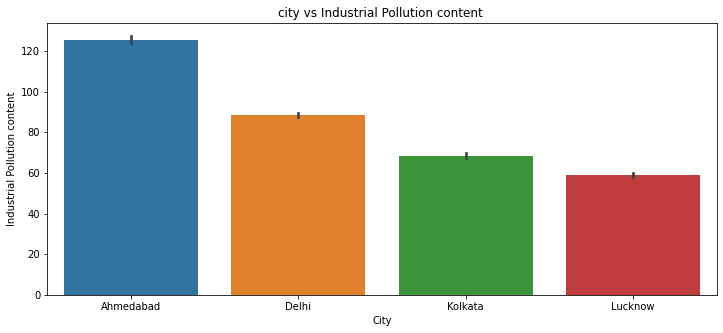

In [17]:
plt.figure(figsize=(12,5))
sns.barplot( x='City', y='Industrial Pollution content',data=data)
plt.title('city vs Industrial Pollution content ')
plt.show

Industrial Pollution content is highest in Ahmedabad,followed by Delhi, Kolkata, Lucknow

<function matplotlib.pyplot.show(close=None, block=None)>

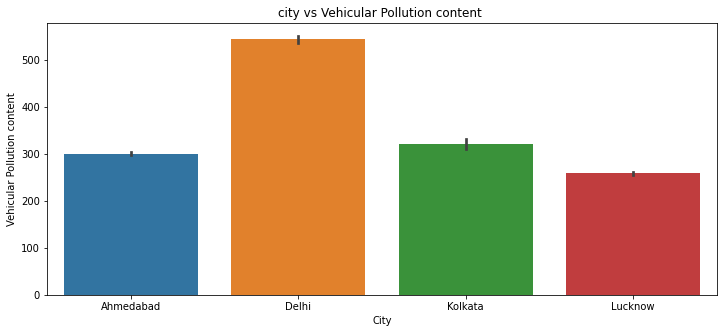

In [18]:
plt.figure(figsize=(12,5))
sns.barplot( x='City', y='Vehicular Pollution content', data=data)
plt.title('city vs Vehicular Pollution content ')
plt.show

EDA of Ahemedabad

In [19]:
data_Ahmedabad=data[(data["City"]=="Ahmedabad")]

In [20]:
data_Ahmedabad=data_Ahmedabad.drop(columns='Date')

In [21]:
data_Ahmedabad

,City,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,Vehicular Pollution content,Industrial Pollution content
0,Ahmedabad,73.24,141.54,0.92,18.22,17.15,33.85,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,2015,1,285.84,161.02
1,Ahmedabad,73.24,141.54,0.97,15.69,16.46,33.85,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,2015,2,282.72,71.56
2,Ahmedabad,73.24,141.54,17.40,19.30,29.70,33.85,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,2015,3,332.43,85.22
3,Ahmedabad,73.24,141.54,1.70,18.48,17.97,33.85,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,2015,4,288.48,70.24
4,Ahmedabad,73.24,141.54,22.10,21.42,37.76,33.85,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,2015,5,352.01,107.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15685,Ahmedabad,62.12,118.67,9.18,56.35,19.86,33.85,0.49,12.44,68.05,1.32,37.76,1.62,92.0,Satisfactory,2020,6,300.52,121.19
15686,Ahmedabad,31.57,118.67,6.37,23.99,16.40,33.85,0.52,11.01,26.34,1.37,49.58,1.34,82.0,Satisfactory,2020,6,231.37,89.64
15687,Ahmedabad,29.75,127.98,9.06,25.15,18.92,33.85,0.67,12.10,34.99,1.39,60.21,0.79,74.0,Satisfactory,2020,6,245.38,109.48
15688,Ahmedabad,40.02,121.10,7.09,58.92,33.41,33.85,0.73,16.39,41.64,1.21,44.10,1.35,98.0,Satisfactory,2020,6,295.12,104.69


In [22]:
data_Ahmedabad.head()

,City,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,Vehicular Pollution content,Industrial Pollution content
0,Ahmedabad,73.24,141.54,0.92,18.22,17.15,33.85,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,2015,1,285.84,161.02
1,Ahmedabad,73.24,141.54,0.97,15.69,16.46,33.85,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,2015,2,282.72,71.56
2,Ahmedabad,73.24,141.54,17.40,19.30,29.70,33.85,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,2015,3,332.43,85.22
3,Ahmedabad,73.24,141.54,1.70,18.48,17.97,33.85,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,2015,4,288.48,70.24
4,Ahmedabad,73.24,141.54,22.10,21.42,37.76,33.85,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,2015,5,352.01,107.32


In [23]:
df_Ahmedabad=data.iloc[0:2009]

In [24]:
df_Ahmedabad

,City,Date,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,Vehicular Pollution content,Industrial Pollution content
0,Ahmedabad,2015-01-01,73.24,141.54,0.92,18.22,17.15,33.85,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor,2015,1,285.84,161.02
1,Ahmedabad,2015-02-01,73.24,141.54,0.97,15.69,16.46,33.85,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor,2015,2,282.72,71.56
2,Ahmedabad,2015-03-01,73.24,141.54,17.40,19.30,29.70,33.85,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor,2015,3,332.43,85.22
3,Ahmedabad,2015-04-01,73.24,141.54,1.70,18.48,17.97,33.85,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor,2015,4,288.48,70.24
4,Ahmedabad,2015-05-01,73.24,141.54,22.10,21.42,37.76,33.85,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor,2015,5,352.01,107.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,Ahmedabad,2020-06-27,62.12,118.67,9.18,56.35,19.86,33.85,0.49,12.44,68.05,1.32,37.76,1.62,92.0,Satisfactory,2020,6,300.52,121.19
2005,Ahmedabad,2020-06-28,31.57,118.67,6.37,23.99,16.40,33.85,0.52,11.01,26.34,1.37,49.58,1.34,82.0,Satisfactory,2020,6,231.37,89.64
2006,Ahmedabad,2020-06-29,29.75,127.98,9.06,25.15,18.92,33.85,0.67,12.10,34.99,1.39,60.21,0.79,74.0,Satisfactory,2020,6,245.38,109.48
2007,Ahmedabad,2020-06-30,40.02,121.10,7.09,58.92,33.41,33.85,0.73,16.39,41.64,1.21,44.10,1.35,98.0,Satisfactory,2020,6,295.12,104.69


Text(0.5, 1.0, 'Satisfactory level of Ahmedabad')

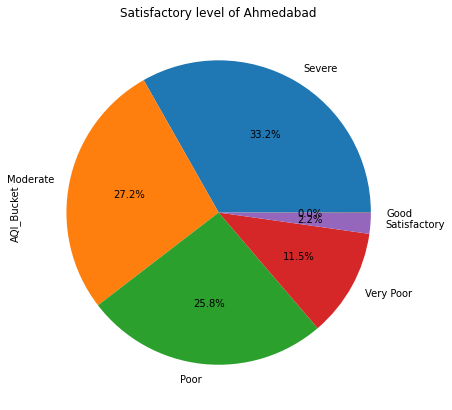

In [25]:
plt.figure(figsize=(7,7))
df_Ahmedabad['AQI_Bucket'].value_counts().plot(kind='pie',subplots=True, autopct='%1.1f%%')
plt.title('Satisfactory level of Ahmedabad')

<function matplotlib.pyplot.show(close=None, block=None)>

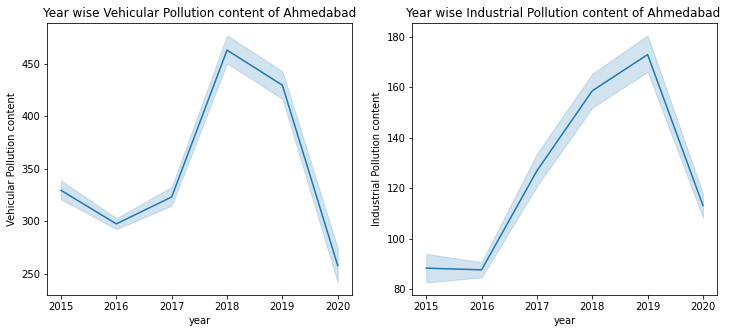

In [26]:
#EDA FOR AHMEDABAD
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.lineplot(data=df_Ahmedabad, x="year", y="Vehicular Pollution content")
plt.title('Year wise Vehicular Pollution content of Ahmedabad')
plt.subplot(1,2,2)
sns.lineplot(data=df_Ahmedabad, x="year", y="Industrial Pollution content")
plt.title('Year wise Industrial Pollution content of Ahmedabad ')
plt.show

EDA of Delhi

In [27]:
data_Delhi=data[(data["City"]=="Delhi")]
data_Delhi=data_Delhi.drop(columns='Date')

In [28]:
data_Delhi.head()

,City,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,Vehicular Pollution content,Industrial Pollution content
2009,Delhi,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,2015,1,1186.39,99.99
2010,Delhi,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,2015,2,680.20,71.55
2011,Delhi,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,2015,3,403.23,38.49
2012,Delhi,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,2015,4,646.12,47.30
2013,Delhi,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,2015,5,584.99,38.50


In [29]:
df_delhi=data.iloc[2009:4018]
df_delhi

,City,Date,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,Vehicular Pollution content,Industrial Pollution content
2009,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe,2015,1,1186.39,99.99
2010,Delhi,2015-02-01,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe,2015,2,680.20,71.55
2011,Delhi,2015-03-01,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate,2015,3,403.23,38.49
2012,Delhi,2015-04-01,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor,2015,4,646.12,47.30
2013,Delhi,2015-05-01,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor,2015,5,584.99,38.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,Delhi,2020-06-27,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,Moderate,2020,6,282.85,51.37
4014,Delhi,2020-06-28,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,Moderate,2020,6,456.51,57.33
4015,Delhi,2020-06-29,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,Poor,2020,6,311.84,65.25
4016,Delhi,2020-06-30,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,Moderate,2020,6,200.49,66.23


Text(0.5, 1.0, 'Satisfactory level of Delhi')

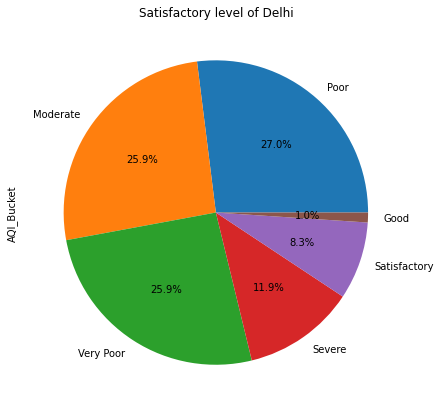

In [30]:
plt.figure(figsize=(7,7))
df_delhi['AQI_Bucket'].value_counts().plot(kind='pie',subplots=True, autopct='%1.1f%%')
plt.title('Satisfactory level of Delhi')

The AQI of Delhi was poor for almost 27.9% and good level was only 1%

<function matplotlib.pyplot.show(close=None, block=None)>

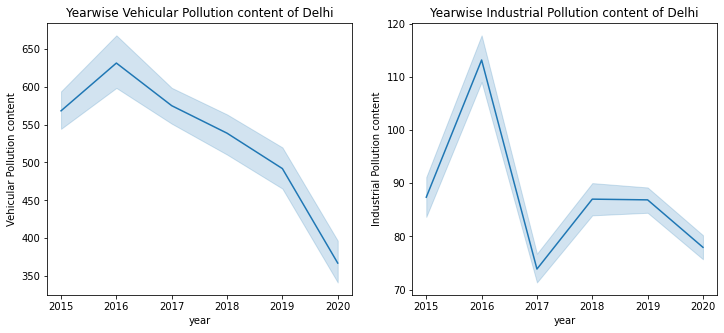

In [31]:
#EDA FOR DELHI
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.lineplot(data=df_delhi, x="year", y="Vehicular Pollution content")
plt.title('Yearwise Vehicular Pollution content of Delhi')
plt.subplot(1,2,2)
sns.lineplot(data=df_delhi, x="year", y="Industrial Pollution content")
plt.title('Yearwise Industrial Pollution content of Delhi')
plt.show

EDA of Kolkata

In [32]:
data_kolkata=data[(data["City"]=="Kolkata")]
data_kolkata=data_kolkata.drop(columns='Date')

In [33]:
data_kolkata.head()

,City,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,Vehicular Pollution content,Industrial Pollution content
4018,Kolkata,34.38,57.00,6.33,40.97,16.81,2.52,1.00,25.46,29.73,2.03,23.57,0.65,73.0,Satisfactory,2018,10,159.01,81.44
4019,Kolkata,29.00,50.87,3.26,34.03,45.29,3.59,0.98,10.32,30.99,4.64,0.88,0.65,73.0,Satisfactory,2018,11,167.02,47.48
4020,Kolkata,21.70,43.04,3.49,39.49,42.54,3.77,0.73,10.32,43.72,5.33,1.76,0.65,60.0,Satisfactory,2018,12,154.76,61.78
4021,Kolkata,23.09,46.49,3.69,33.03,36.72,3.88,0.98,10.32,41.65,6.78,2.23,0.65,74.0,Satisfactory,2018,4,147.88,61.63
4022,Kolkata,21.56,42.10,2.81,26.62,29.43,4.22,1.00,10.32,44.07,5.09,2.33,0.65,83.0,Satisfactory,2018,4,127.74,62.46


In [34]:
df_kolkata=data.iloc[4018:4832]
df_kolkata

,City,Date,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,Vehicular Pollution content,Industrial Pollution content
4018,Kolkata,2018-10-04,34.38,57.00,6.33,40.97,16.81,2.52,1.00,25.46,29.73,2.03,23.57,0.65,73.0,Satisfactory,2018,10,159.01,81.44
4019,Kolkata,2018-11-04,29.00,50.87,3.26,34.03,45.29,3.59,0.98,10.32,30.99,4.64,0.88,0.65,73.0,Satisfactory,2018,11,167.02,47.48
4020,Kolkata,2018-12-04,21.70,43.04,3.49,39.49,42.54,3.77,0.73,10.32,43.72,5.33,1.76,0.65,60.0,Satisfactory,2018,12,154.76,61.78
4021,Kolkata,2018-04-13,23.09,46.49,3.69,33.03,36.72,3.88,0.98,10.32,41.65,6.78,2.23,0.65,74.0,Satisfactory,2018,4,147.88,61.63
4022,Kolkata,2018-04-14,21.56,42.10,2.81,26.62,29.43,4.22,1.00,10.32,44.07,5.09,2.33,0.65,83.0,Satisfactory,2018,4,127.74,62.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,Kolkata,2020-06-27,7.89,24.73,5.24,9.25,14.52,8.39,0.35,5.73,23.14,1.68,11.31,0.24,37.0,Good,2020,6,70.37,42.10
4828,Kolkata,2020-06-28,10.58,25.56,5.94,12.63,18.62,6.92,0.38,5.92,27.76,1.32,11.07,0.34,43.0,Good,2020,6,80.63,46.41
4829,Kolkata,2020-06-29,14.53,32.40,5.42,15.98,21.45,7.59,0.45,7.01,30.64,3.18,9.78,0.34,48.0,Good,2020,6,97.82,50.95
4830,Kolkata,2020-06-30,14.00,35.85,6.25,12.29,18.12,9.64,0.37,5.66,24.59,2.46,10.75,0.27,47.0,Good,2020,6,96.52,43.73


Text(0.5, 1.0, 'Satisfactory level of Kolkata')

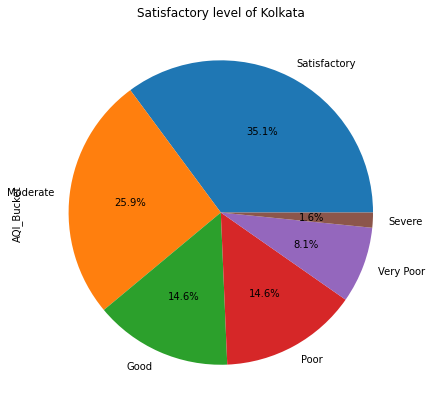

In [35]:
plt.figure(figsize=(7,7))
df_kolkata['AQI_Bucket'].value_counts().plot(kind='pie',subplots=True, autopct='%1.1f%%')
plt.title('Satisfactory level of Kolkata')

<function matplotlib.pyplot.show(close=None, block=None)>

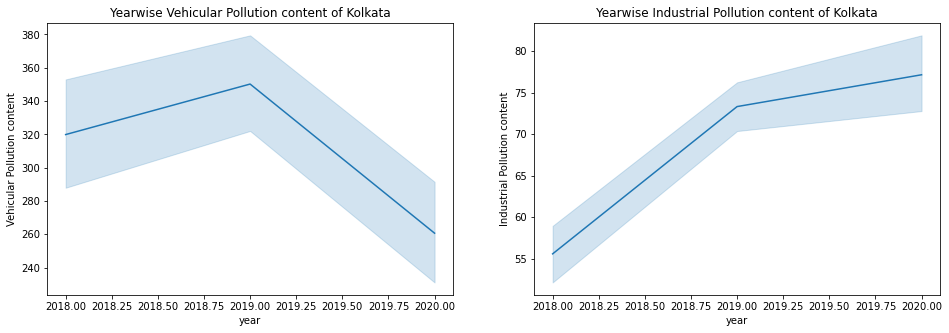

In [36]:
#eda of kolkata
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.lineplot(data=df_kolkata, x="year", y="Vehicular Pollution content")
plt.title('Yearwise Vehicular Pollution content of Kolkata')
plt.subplot(1,2,2)
sns.lineplot(data=df_kolkata, x="year", y="Industrial Pollution content")
plt.title('Yearwise Industrial Pollution content of Kolkata')
plt.show

EDA of Lucknow

In [37]:
data_lucknow=data[(data["City"]=="Lucknow")]
data_lucknow=data_lucknow.drop(columns='Date')

In [38]:
data_lucknow.head()

,City,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,Vehicular Pollution content,Industrial Pollution content
4832,Lucknow,742.67,31.58,2.11,13.46,4.57,8.91,12.15,169.57,25.92,1.35,3.93,0.18,607.0,Severe,2015,1,815.45,200.95
4833,Lucknow,742.67,31.58,2.37,10.76,3.80,8.91,14.00,169.46,21.66,1.97,5.74,0.18,607.0,Severe,2015,2,814.09,199.01
4834,Lucknow,742.67,31.58,2.27,12.43,4.22,8.91,12.78,169.77,22.40,1.83,4.76,0.18,607.0,Severe,2015,3,814.86,198.94
4835,Lucknow,742.67,31.58,2.24,12.46,4.22,8.91,11.85,169.56,21.41,2.27,4.77,0.18,607.0,Severe,2015,4,813.93,198.19
4836,Lucknow,742.67,31.58,2.32,12.27,4.22,8.91,13.34,169.48,20.60,2.49,4.78,0.18,607.0,Severe,2015,5,815.31,197.53


In [39]:
df_lucknow=data.iloc[4833:6841]
df_lucknow

,City,Date,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,Vehicular Pollution content,Industrial Pollution content
4833,Lucknow,2015-02-01,742.67,31.58,2.37,10.76,3.80,8.91,14.00,169.46,21.66,1.97,5.74,0.18,607.0,Severe,2015,2,814.09,199.01
4834,Lucknow,2015-03-01,742.67,31.58,2.27,12.43,4.22,8.91,12.78,169.77,22.40,1.83,4.76,0.18,607.0,Severe,2015,3,814.86,198.94
4835,Lucknow,2015-04-01,742.67,31.58,2.24,12.46,4.22,8.91,11.85,169.56,21.41,2.27,4.77,0.18,607.0,Severe,2015,4,813.93,198.19
4836,Lucknow,2015-05-01,742.67,31.58,2.32,12.27,4.22,8.91,13.34,169.48,20.60,2.49,4.78,0.18,607.0,Severe,2015,5,815.31,197.53
4837,Lucknow,2015-06-01,742.67,31.58,2.33,12.91,4.30,8.91,14.21,178.63,21.49,2.93,4.60,0.18,607.0,Severe,2015,6,816.91,207.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6836,Lucknow,2020-06-27,32.23,31.58,9.47,19.22,17.78,11.63,0.80,3.77,56.36,10.16,24.19,0.18,74.0,Satisfactory,2020,6,122.71,94.66
6837,Lucknow,2020-06-28,34.58,31.58,10.39,17.67,17.60,11.68,0.81,2.85,56.40,10.98,13.78,0.18,77.0,Satisfactory,2020,6,124.31,84.19
6838,Lucknow,2020-06-29,30.19,31.58,12.14,18.47,18.87,11.63,0.80,3.36,43.61,15.05,11.58,0.18,65.0,Satisfactory,2020,6,123.68,73.78
6839,Lucknow,2020-06-30,38.27,31.58,6.14,11.94,11.95,11.79,0.72,4.31,41.17,21.78,7.49,0.18,69.0,Satisfactory,2020,6,112.39,74.93


Text(0.5, 1.0, 'Satisfactory level of Lucknow')

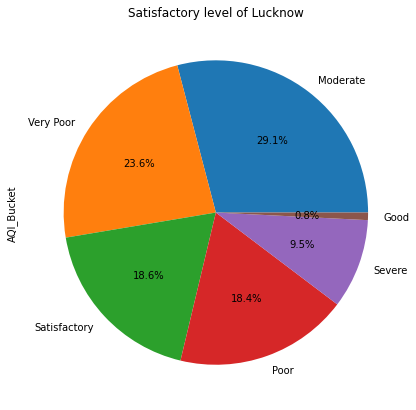

In [40]:
plt.figure(figsize=(7,7))
df_lucknow['AQI_Bucket'].value_counts().plot(kind='pie',subplots=True, autopct='%1.1f%%')
plt.title('Satisfactory level of Lucknow')

<function matplotlib.pyplot.show(close=None, block=None)>

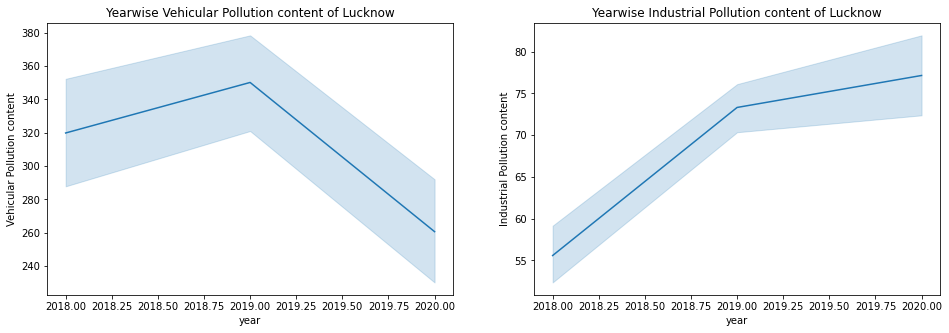

In [41]:
#eda of lucknow
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.lineplot(data=df_kolkata, x="year", y="Vehicular Pollution content")
plt.title('Yearwise Vehicular Pollution content of Lucknow')
plt.subplot(1,2,2)
sns.lineplot(data=df_kolkata, x="year", y="Industrial Pollution content")
plt.title('Yearwise Industrial Pollution content of Lucknow')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

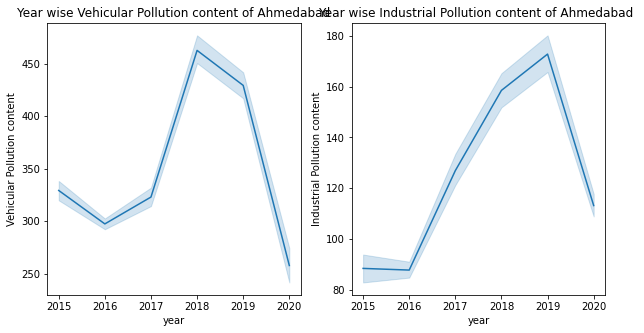

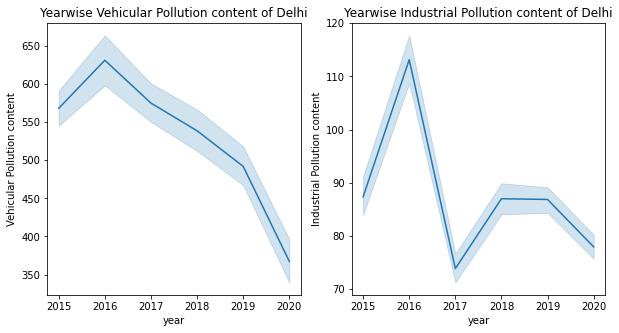

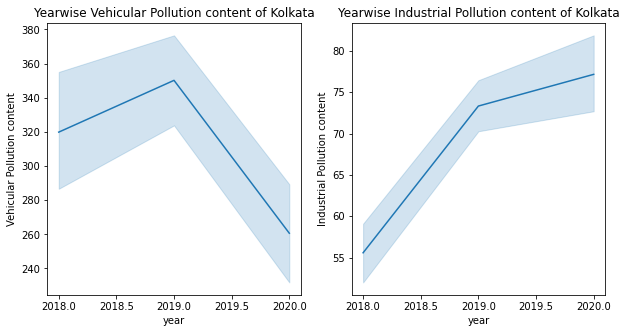

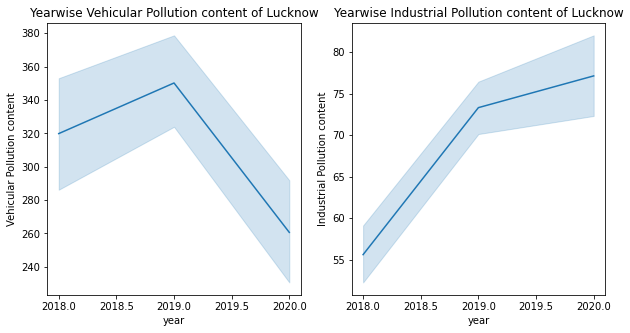

In [42]:
#EDA FOR AHMEDABAD
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.lineplot(data=df_Ahmedabad, x="year", y="Vehicular Pollution content")
plt.title('Year wise Vehicular Pollution content of Ahmedabad')
plt.subplot(1,2,2)
sns.lineplot(data=df_Ahmedabad, x="year", y="Industrial Pollution content")
plt.title('Year wise Industrial Pollution content of Ahmedabad ')
plt.show
#EDA FOR DELHI
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.lineplot(data=df_delhi, x="year", y="Vehicular Pollution content")
plt.title('Yearwise Vehicular Pollution content of Delhi')
plt.subplot(1,2,2)
sns.lineplot(data=df_delhi, x="year", y="Industrial Pollution content")
plt.title('Yearwise Industrial Pollution content of Delhi')
plt.show
#eda for kolkata
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.lineplot(data=df_kolkata, x="year", y="Vehicular Pollution content")
plt.title('Yearwise Vehicular Pollution content of Kolkata')
plt.subplot(1,2,2)
sns.lineplot(data=df_kolkata, x="year", y="Industrial Pollution content")
plt.title('Yearwise Industrial Pollution content of Kolkata')
plt.show
#eda for lucknow
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.lineplot(data=df_kolkata, x="year", y="Vehicular Pollution content")
plt.title('Yearwise Vehicular Pollution content of Lucknow')
plt.subplot(1,2,2)
sns.lineplot(data=df_kolkata, x="year", y="Industrial Pollution content")
plt.title('Yearwise Industrial Pollution content of Lucknow')
plt.show

Distribution of different pollutants during 2015-2020 

In [43]:
#set date as index
data.set_index('Date',inplace=True)

In [44]:
df_pollutants =data.copy()

In [45]:
pollutants = ['PM25', 'PM10', 'NO', 'NO2', 'NOx',
       'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

In [46]:
df_pollutants =df_pollutants[pollutants]

Distribution of different pollutants during 2015-2020


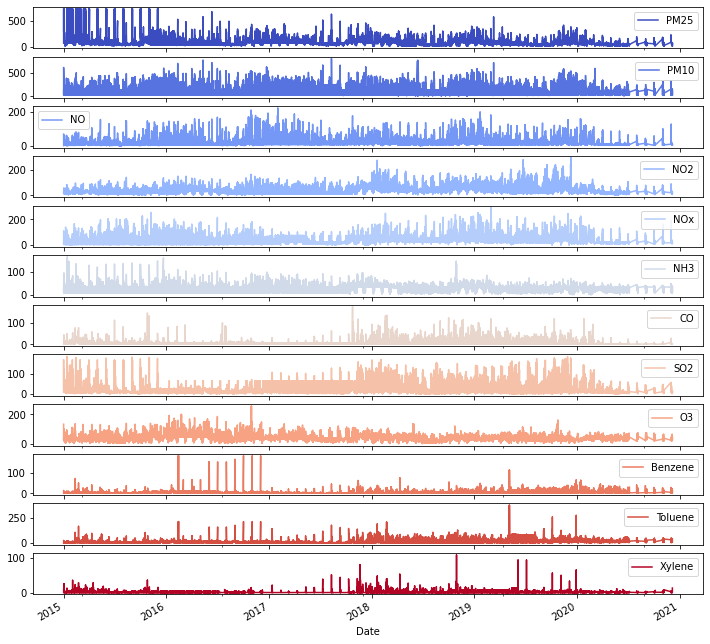

In [47]:
df_pollutants.plot(kind='line',figsize=(12,12),cmap='coolwarm',subplots=True,fontsize=10)
print('Distribution of different pollutants during 2015-2020')

In [48]:
#load data
data=pd.read_csv('city_data.csv') 

In [49]:
#check shape
data.shape

(20522, 16)

In [50]:
#check columns
data.columns

Index(['City', 'Date', 'PM25', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [51]:
#get data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20522 entries, 0 to 20521
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20522 non-null  object 
 1   Date        20522 non-null  object 
 2   PM25        18162 non-null  float64
 3   PM10        9294 non-null   float64
 4   NO          18539 non-null  float64
 5   NO2         18545 non-null  float64
 6   NOx         17765 non-null  float64
 7   NH3         11457 non-null  float64
 8   CO          18611 non-null  float64
 9   SO2         17894 non-null  float64
 10  O3          17984 non-null  float64
 11  Benzene     18773 non-null  float64
 12  Toluene     18662 non-null  float64
 13  Xylene      9440 non-null   float64
 14  AQI         17940 non-null  float64
 15  AQI_Bucket  17940 non-null  object 
dtypes: float64(13), object(3)
memory usage: 2.5+ MB


DATA PREPROCESSING(
FILLING NULL VALUES)

In [52]:
#check null values
data.isna().sum()

City              0
Date              0
PM25           2360
PM10          11228
NO             1983
NO2            1977
NOx            2757
NH3            9065
CO             1911
SO2            2628
O3             2538
Benzene        1749
Toluene        1860
Xylene        11082
AQI            2582
AQI_Bucket     2582
dtype: int64

In [53]:
#backward and forward filling
data['PM25'].fillna(method = 'bfill',inplace = True )
data['PM10'].fillna(method = 'bfill',inplace = True )
data['PM10'].fillna(method = 'ffill',inplace = True )
data['NO'].fillna(method = 'ffill',inplace = True )
data['NO2'].fillna(method = 'ffill',inplace = True )
data['NOx'].fillna(method = 'ffill',inplace = True )
data['NH3'].fillna(method = 'bfill',inplace = True )
data['CO'].fillna(method = 'ffill',inplace = True )
data['SO2'].fillna(method = 'ffill',inplace = True )
data['O3'].fillna(method = 'ffill',inplace = True )
data['Benzene'].fillna(method = 'ffill',inplace = True )
data['Toluene'].fillna(method = 'ffill',inplace = True )
data['Xylene'].fillna(method = 'ffill',inplace = True )
data['AQI'].fillna(method = 'bfill',inplace = True )
data['AQI_Bucket'].fillna(method = 'bfill',inplace = True )

In [54]:
#recheck null values
data.isna().sum()

City          0
Date          0
PM25          0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

DROP UNNECESSARY COLUMNS

In [55]:
data=data.drop('Date',axis=1 )

In [56]:
data

,City,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,73.24,141.54,0.92,18.22,17.15,33.85,0.92,27.64,133.36,0.00,0.02,0.00,209.0,Poor
1,Ahmedabad,73.24,141.54,0.97,15.69,16.46,33.85,0.97,24.55,34.06,3.68,5.50,3.77,209.0,Poor
2,Ahmedabad,73.24,141.54,17.40,19.30,29.70,33.85,17.40,29.07,30.70,6.80,16.40,2.25,209.0,Poor
3,Ahmedabad,73.24,141.54,1.70,18.48,17.97,33.85,1.70,18.59,36.08,4.43,10.14,1.00,209.0,Poor
4,Ahmedabad,73.24,141.54,22.10,21.42,37.76,33.85,22.10,39.33,39.31,7.01,18.89,2.78,209.0,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20517,Lucknow,32.23,31.58,9.47,19.22,17.78,11.63,0.80,3.77,56.36,10.16,24.19,0.18,74.0,Satisfactory
20518,Lucknow,34.58,31.58,10.39,17.67,17.60,11.68,0.81,2.85,56.40,10.98,13.78,0.18,77.0,Satisfactory
20519,Lucknow,30.19,31.58,12.14,18.47,18.87,11.63,0.80,3.36,43.61,15.05,11.58,0.18,65.0,Satisfactory
20520,Lucknow,38.27,31.58,6.14,11.94,11.95,11.79,0.72,4.31,41.17,21.78,7.49,0.18,69.0,Satisfactory


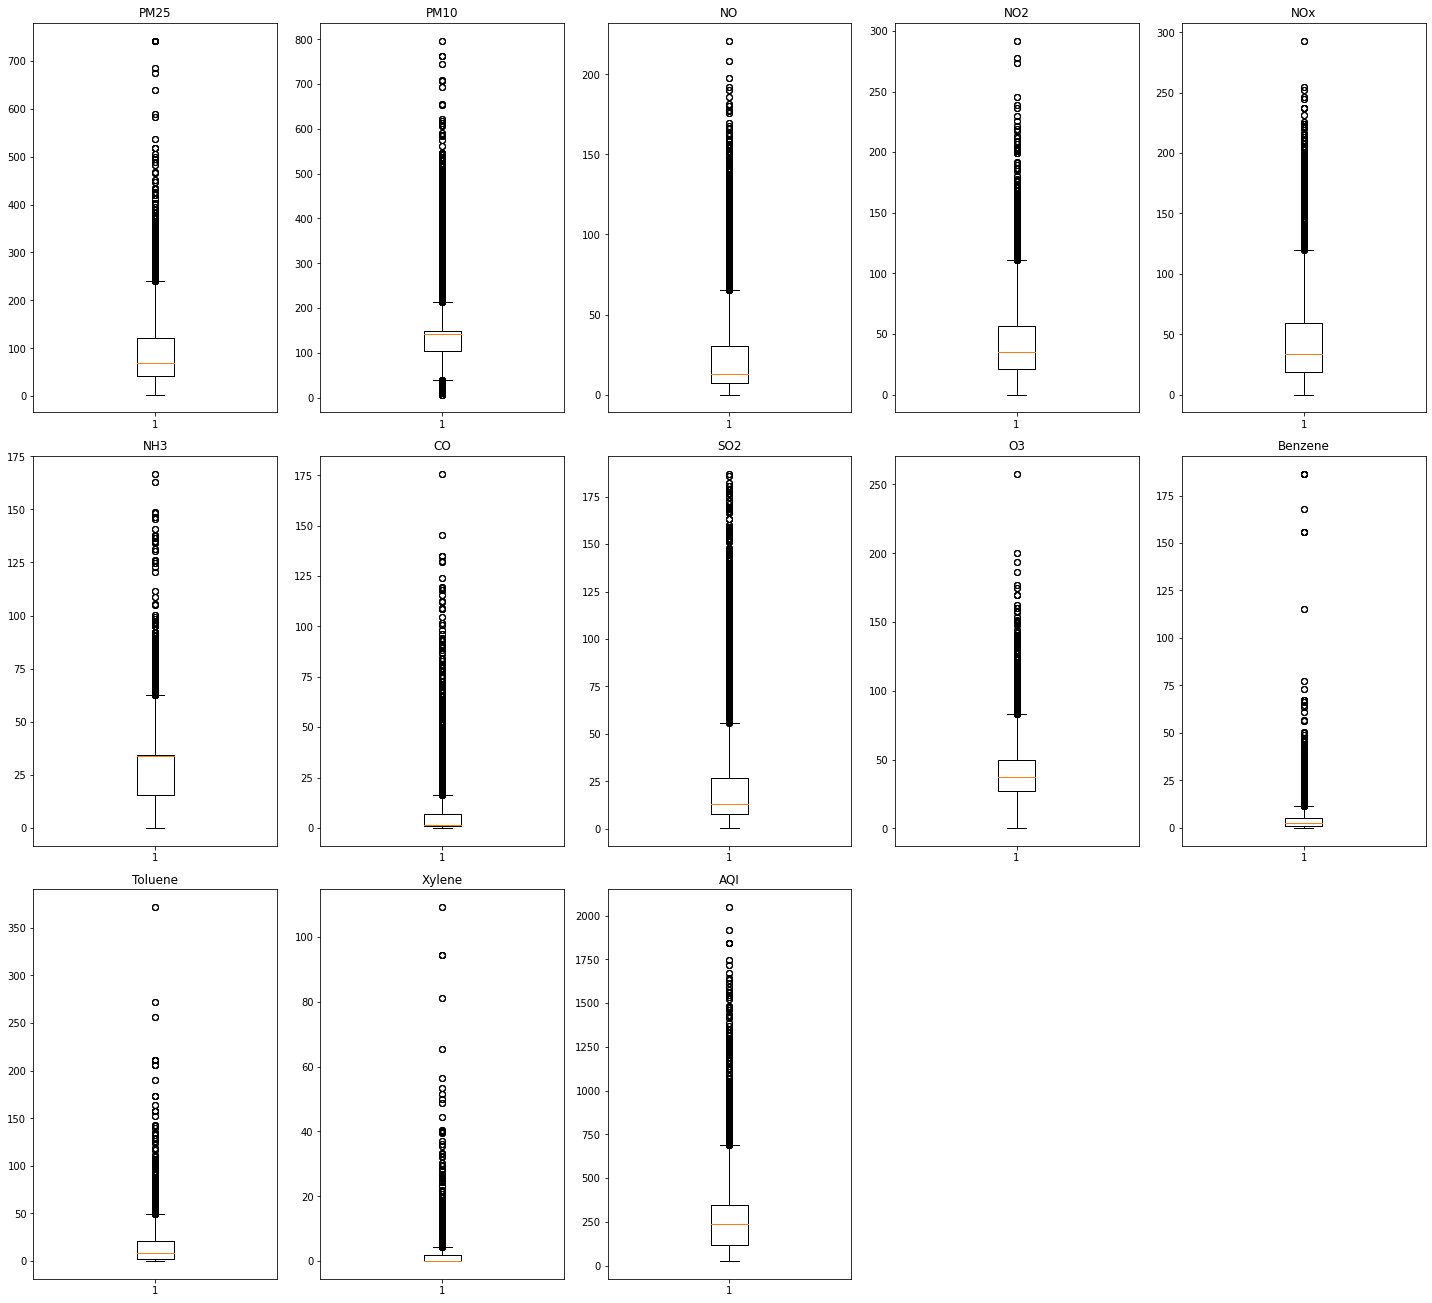

In [57]:
num_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(num_col):
                     plt.subplot(5,5,i+1)
                     plt.boxplot(data[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

ENCODING
(LABEL ENCODING -to convert categorical data to numerical data)

In [58]:
#import library
from sklearn.preprocessing import LabelEncoder

In [59]:
#fit the model
label_encoder=LabelEncoder()

In [60]:
data['City']=label_encoder.fit_transform(data['City'])

In [61]:
data['AQI_Bucket']=label_encoder.fit_transform(data['AQI_Bucket'])
data

,City,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,73.24,141.54,0.92,18.22,17.15,33.85,0.92,27.64,133.36,0.00,0.02,0.00,209.0,2
1,0,73.24,141.54,0.97,15.69,16.46,33.85,0.97,24.55,34.06,3.68,5.50,3.77,209.0,2
2,0,73.24,141.54,17.40,19.30,29.70,33.85,17.40,29.07,30.70,6.80,16.40,2.25,209.0,2
3,0,73.24,141.54,1.70,18.48,17.97,33.85,1.70,18.59,36.08,4.43,10.14,1.00,209.0,2
4,0,73.24,141.54,22.10,21.42,37.76,33.85,22.10,39.33,39.31,7.01,18.89,2.78,209.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20517,3,32.23,31.58,9.47,19.22,17.78,11.63,0.80,3.77,56.36,10.16,24.19,0.18,74.0,3
20518,3,34.58,31.58,10.39,17.67,17.60,11.68,0.81,2.85,56.40,10.98,13.78,0.18,77.0,3
20519,3,30.19,31.58,12.14,18.47,18.87,11.63,0.80,3.36,43.61,15.05,11.58,0.18,65.0,3
20520,3,38.27,31.58,6.14,11.94,11.95,11.79,0.72,4.31,41.17,21.78,7.49,0.18,69.0,3



standard scaling

In [62]:
X=data.drop(['City','AQI','AQI_Bucket'],axis=1)
y=data['AQI']

testing data

In [63]:
y

0        209.0
1        209.0
2        209.0
3        209.0
4        209.0
         ...  
20517     74.0
20518     77.0
20519     65.0
20520     69.0
20521     76.0
Name: AQI, Length: 20522, dtype: float64

training data


In [64]:
X

,PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,73.24,141.54,0.92,18.22,17.15,33.85,0.92,27.64,133.36,0.00,0.02,0.00
1,73.24,141.54,0.97,15.69,16.46,33.85,0.97,24.55,34.06,3.68,5.50,3.77
2,73.24,141.54,17.40,19.30,29.70,33.85,17.40,29.07,30.70,6.80,16.40,2.25
3,73.24,141.54,1.70,18.48,17.97,33.85,1.70,18.59,36.08,4.43,10.14,1.00
4,73.24,141.54,22.10,21.42,37.76,33.85,22.10,39.33,39.31,7.01,18.89,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...
20517,32.23,31.58,9.47,19.22,17.78,11.63,0.80,3.77,56.36,10.16,24.19,0.18
20518,34.58,31.58,10.39,17.67,17.60,11.68,0.81,2.85,56.40,10.98,13.78,0.18
20519,30.19,31.58,12.14,18.47,18.87,11.63,0.80,3.36,43.61,15.05,11.58,0.18
20520,38.27,31.58,6.14,11.94,11.95,11.79,0.72,4.31,41.17,21.78,7.49,0.18


In [65]:
#import library
from sklearn.preprocessing import StandardScaler
#fitting the model
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [66]:
type(X)

numpy.ndarray

In [67]:
X.shape


(20522, 12)

In [68]:
y.shape

(20522,)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

MODELLING

1. Support Vector Regression

In [70]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [71]:
param_grid = {'C':[0.8],
             'kernel':['rbf'],
              'epsilon':[0.2]}

In [72]:
from sklearn.model_selection import GridSearchCV
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.8], 'epsilon': [0.2], 'kernel': ['rbf']})

In [73]:
grid.best_params_

{'C': 0.8, 'epsilon': 0.2, 'kernel': 'rbf'}

In [74]:
model_predict=grid.predict(X_test)

In [75]:
MSE_svr=mean_squared_error(y_test,model_predict)
R2_svr=r2_score(y_test,model_predict)
RMSE_svr= np.sqrt(mean_squared_error(y_test, model_predict))
MAE_svr=mean_absolute_error(y_test,model_predict)
print('Mean Squared Error is',mean_squared_error(y_test,model_predict))
print('R Squared Value is',r2_score(y_test,model_predict))
print('RMSE:', np.sqrt(mean_squared_error(y_test, model_predict)))
print('mean absolute error is',mean_absolute_error(y_test,model_predict))

Mean Squared Error is 18034.549254650763
R Squared Value is 0.5747553681318649
RMSE: 134.29277439479299
mean absolute error is 58.54171665459529


In [76]:
predictedAQI =grid.predict([[-0.125654,	0.339070,	-1.002317,	-0.701972,	-0.626559,	0.464434,	-0.612915	,0.652256	,2.326095	,-1.046014	,-0.902895	,-0.796089]])
print(predictedAQI)

[220.85054792]


2.Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)
print(model.intercept_)
print(model.coef_)

270.14663222403783
[ 75.86681888  16.91646451 -10.23178923  48.99211728  -5.97033019
   6.15881189 132.25740981 -13.71571719  10.62544017   2.85181776
   5.59879192   7.56398932]


In [78]:
MSE_lr= mean_squared_error(y_test,predictions)
R2_lr=r2_score(y_test,predictions)
RMSE_lr= np.sqrt(mean_squared_error(y_test, predictions))
MAE_lr=mean_absolute_error(y_test,predictions)
print('Mean Squared Error is',mean_squared_error(y_test,predictions))
print('R Squared Value is',r2_score(y_test,predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('mean absolute error is',mean_absolute_error(y_test,predictions))

Mean Squared Error is 10518.485893480123
R Squared Value is 0.7519799581112545
RMSE: 102.55966991698112
mean absolute error is 56.82554293219859


In [79]:
predictedAQI =lr.predict([[-0.125654,	0.339070,	-1.002317,	-0.701972,	-0.626559,	0.464434,	-0.612915	,0.652256	,2.326095	,-1.046014	,-0.902895	,-0.796089]])
print(predictedAQI)

[169.46235892]


3. Random Forest Regressor

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

In [81]:
MSE_rf=mean_squared_error(y_test,test_pred)
R2_rf=r2_score(y_test,test_pred)
RMSE_rf= np.sqrt(mean_squared_error(y_test, test_pred))
MAE_rf=mean_absolute_error(y_test,test_pred)
print('Mean Squared Error is',mean_squared_error(y_test,test_pred))
print('R Squared Value is',r2_score(y_test,test_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, test_pred)))
print('mean absolute error is',mean_absolute_error(y_test,test_pred))

Mean Squared Error is 809.3173767883834
R Squared Value is 0.9809167467898812
RMSE: 28.448503946400827
mean absolute error is 10.773486159450892


In [82]:
predictedAQI =rf_reg.predict([[-0.125654,	0.339070,	-1.002317,	-0.701972,	-0.626559,	0.464434,	-0.612915	,0.652256	,2.326095	,-1.046014	,-0.902895	,-0.796089 ]])
print(predictedAQI)

[230.96]


Comparison

In [83]:
results = pd.DataFrame({'Model': ['Support Vector Regression','Linear Regression','Random Forest Regression'],'Mean Squared Error': [MSE_svr,MSE_lr,MSE_rf],'R2 Score':[R2_svr,R2_lr,R2_rf],'Root Mean Squared Error':[RMSE_svr,RMSE_lr,RMSE_rf],'Mean Absolute Error':[MAE_svr,MAE_lr,MAE_rf]})
results

,Model,Mean Squared Error,R2 Score,Root Mean Squared Error,Mean Absolute Error
0,Support Vector Regression,18034.549255,0.574755,134.292774,58.541717
1,Linear Regression,10518.485893,0.751980,102.559670,56.825543
2,Random Forest Regression,809.317377,0.980917,28.448504,10.773486


In [84]:
result_df=results.sort_values(by='R2 Score',ascending=False)
#result_df = result_df.set_index('Model')
result_df

,Model,Mean Squared Error,R2 Score,Root Mean Squared Error,Mean Absolute Error
2,Random Forest Regression,809.317377,0.980917,28.448504,10.773486
1,Linear Regression,10518.485893,0.751980,102.559670,56.825543
0,Support Vector Regression,18034.549255,0.574755,134.292774,58.541717


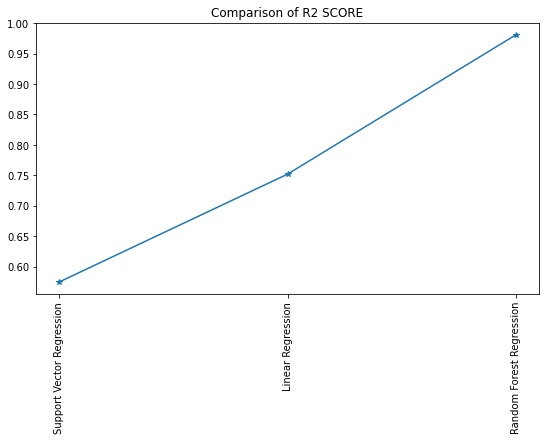

In [85]:
plt.figure(figsize=(9,5))
plt.xticks(range(1,4),['Support Vector Regression','Linear Regression', 'Random Forest Regression'],rotation=90)
plt.plot(range(1,4),[R2_svr,R2_lr,R2_rf],marker='*',label="R2 Score")
plt.title('Comparison of R2 SCORE')
plt.show()

Random forest regression has an accuarcy of 98%